In [6]:
import ipywidgets
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

In [7]:
# функция для генерации случайного датасета
def random_generation(count_lines):
    df = pd.DataFrame(data=[np.round(np.random.random(5), 2) for i in range(count_lines)],
                      columns=['math','chemistry','physics','biology','literature'])
    return df

In [8]:
# функция для создания вкладки визуализации
def tab_visualisation(df, output):
    dropdown = ipywidgets.Dropdown(options=['math','chemistry','physics','biology','literature'],
                            value='math',
                            description='Columns:',
                            disabled=False,)
    select_columns = ipywidgets.Button(description='Нарисовать гистограмму',
                                       button_style = 'success',
                                       layout = ipywidgets.Layout(width='700px', height='40px'))

    # функция для отображения гистсограммы по выбранному столбцу
    def btn_on_click_select(select_columns):

        fig, ax = plt.subplots()
        ax.hist(df[dropdown.value])
        display(plt.show())
        
    select_columns.on_click(btn_on_click_select)
    
    return ipywidgets.VBox([dropdown, select_columns])    

In [9]:
# главная функция для вызова пользователем
def menu():
    
    output = ipywidgets.Output()
    df = None
    
    button_style = 'success'
    layout = ipywidgets.Layout(width='700px', height='40px')
    style = {'description_width': '150px'}
    
    load_button = ipywidgets.Button(description='Загрузить данные из файла',
                                    button_style=button_style, layout=layout)
    generate_button = ipywidgets.Button(description='Сгенерировать данные',
                                        button_style=button_style, layout=layout)
    
    path_text = ipywidgets.Text(description='Путь до файла', 
                                value='students_knowledge.txt', layout=layout, style=style)
    count_samples = ipywidgets.IntText(description='Количество строк', value=100, layout=layout, style=style)

    v_box_input = ipywidgets.VBox([path_text, load_button,
                                   count_samples, generate_button])

    # функция для загруки фацла по прееданному пути
    def btn_on_click_load(load_button):
        
        df = pd.read_csv(v_box_input.children[0].value, sep=';')
        display(df.head(), output)
        
        children_default_main[1] = tab_visualisation(df, output)
        tab_main.children = children_default_main
        
    # функция для генерацции случайного датасета    
    def btn_on_click_generate(generate_button):
        
        df = random_generation(v_box_input.children[2].value)
        display(df.head(), output)
        children_default_main[1] = tab_visualisation(df, output)
        tab_main.children = children_default_main
        
        
    load_button.on_click(btn_on_click_load)
    generate_button.on_click(btn_on_click_generate)
        
    #main tab
    tab_main = ipywidgets.Tab()
    children_default_main = [v_box_input,
                             ipywidgets.Label('Нет данных')]
    
    tab_main.children = children_default_main
    tab_main.set_title(0, 'Загрузка данных')
    tab_main.set_title(1, 'Визуализация')

    display(tab_main, output)
    

Output()

,math,chemistry,physics,biology,literature
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


Output()

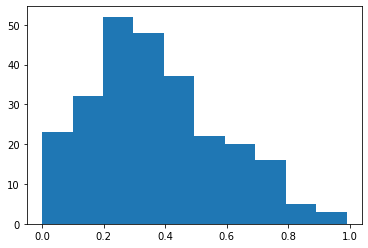

None

In [10]:
menu()